# Insurance Cost Prediction

## Introduction

This project focuses on developing a machine learning solution to predict the medical insurance charges billed to individuals based on personal and health-related factors.

In the health insurance industry, accurate estimation of healthcare costs is crucial for determining fair premiums, managing risks, and maintaining profitability. The dataset used includes features such as **age**, **gender**, **body mass index (BMI)**, **number of children**, **smoking status**, and **region of residence**. These attributes play a significant role in assessing a person's health risk and, consequently, their insurance charges.

The objective is to analyze the data, understand underlying patterns, and apply various machine learning algorithms to build a predictive model. Through data exploration, preprocessing, feature engineering, and model evaluation, the project aims to identify the best-performing model that can reliably predict individual medical expenses.

This solution helps improve pricing strategies in the insurance sector and provides valuable insights into the factors that influence healthcare costs.

## Business Problem

Insurance companies must accurately predict individual medical costs to set fair premiums and avoid financial losses. These costs depend on various personal and lifestyle factors such as age, BMI, gender, smoking status, number of dependents, and region.

The business goal is to build a predictive model that helps insurance providers estimate future healthcare expenses for each customer. This enables better pricing strategies, risk management, and improved customer satisfaction.

## Business Objectives

- **Predict medical insurance charges** for individuals based on personal and lifestyle attributes.

- **Help insurance companies set accurate and fair premium rates** to remain competitive and profitable.

- **Identify key factors influencing healthcare costs** (e.g., smoking, BMI, age).

- **Reduce financial risk** by improving the accuracy of cost estimation.

- **Enhance customer satisfaction** through data-driven, transparent pricing models.

## Understanding the Data

The dataset contains 1,338 records with 7 features related to individual demographics and health-related habits that impact medical insurance charges.

## Features Description

| Feature    | Type        | Description                                                                 |
| ---------- | ----------- | --------------------------------------------------------------------------- |
| `age`      | Numerical   | Age of the insurance policyholder                                           |
| `sex`      | Categorical | Gender of the policyholder (`male`, `female`)                               |
| `bmi`      | Numerical   | Body Mass Index (weight-to-height ratio), useful for health risk assessment |
| `children` | Numerical   | Number of dependents covered under the insurance policy                     |
| `smoker`   | Categorical | Smoking status (`yes`, `no`)                                                |
| `region`   | Categorical | Region of residence in the U.S. (`northeast`, `southeast`, etc.)            |
| `charges`  | Numerical   | Medical costs billed to the insurance customer (target variable)            |

The goal is to use the input features to predict the charges.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# Load the Dataset
data = pd.read_csv(r'C:\Users\rajit\Downloads\PRCP-1021-InsCostPred\Data\datasets_13720_18513_insurance(1).csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Basic Checks

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
data.shape

(1338, 7)

In [12]:
data.duplicated().sum()

1

In [13]:
# Remove Duplicate Row
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
# Check unique values in categorical columns
print("\nUnique values:")

{
    "Sex": data['sex'].unique(),
    "Smoker": data['smoker'].unique(),
    "Region": data['region'].unique()
}


Unique values:


{'Sex': array(['female', 'male'], dtype=object),
 'Smoker': array(['yes', 'no'], dtype=object),
 'Region': array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)}

## Data Preprocessing

### Encode Categorical Variables

In [16]:
# Encode categorical columns using LabelEncoder
le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])            # male=1, female=0       
data['smoker'] = le.fit_transform(data['smoker'])      # yes=1, no=0
data['region'] = le.fit_transform(data['region'])      # northeast=1, northwest=2, etc.

In [17]:
# Check encoded columns
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Feature and Target Separation 

In [18]:
X = data.drop(['charges'], axis=1)
y = data['charges']

### Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Exploratory Data Analysis (EDA)

### Distribution of Numerical Features

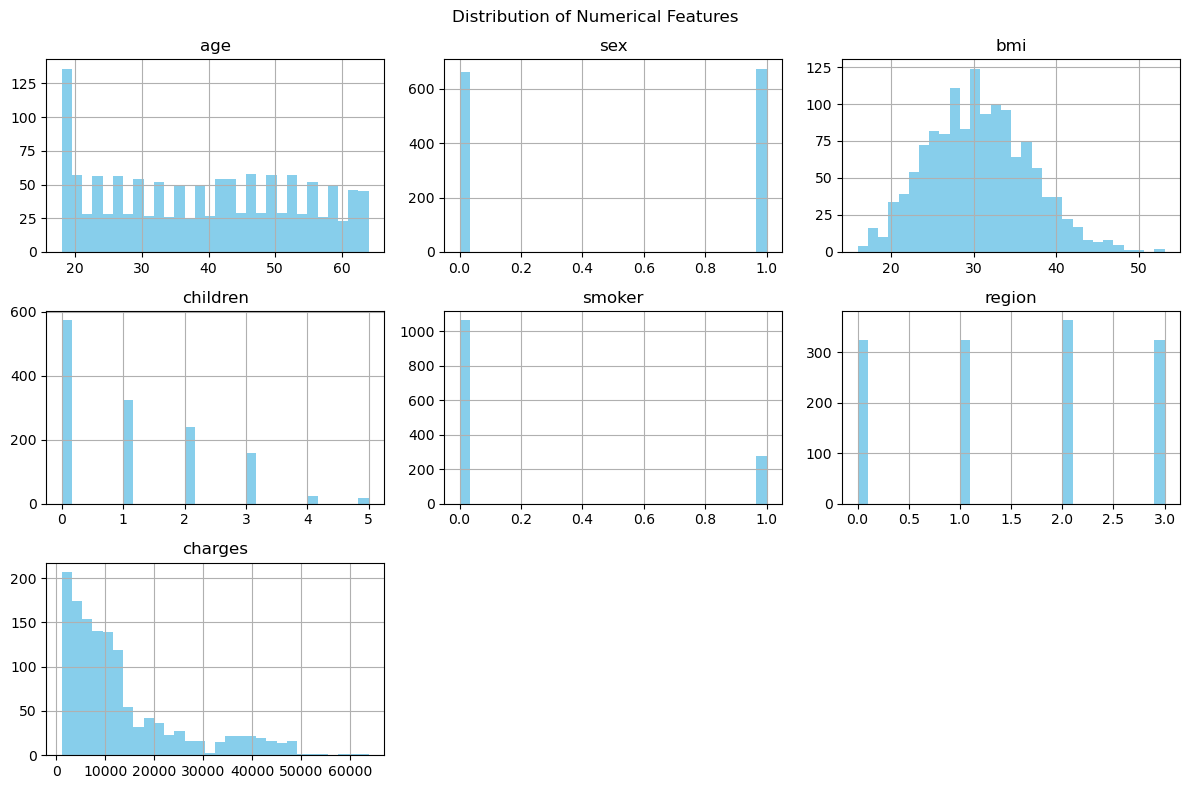

In [21]:
# Histograms for numerical columns
data.hist(bins=30, figsize=(12, 8), color='skyblue')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

### Boxplots to Detect Outliers

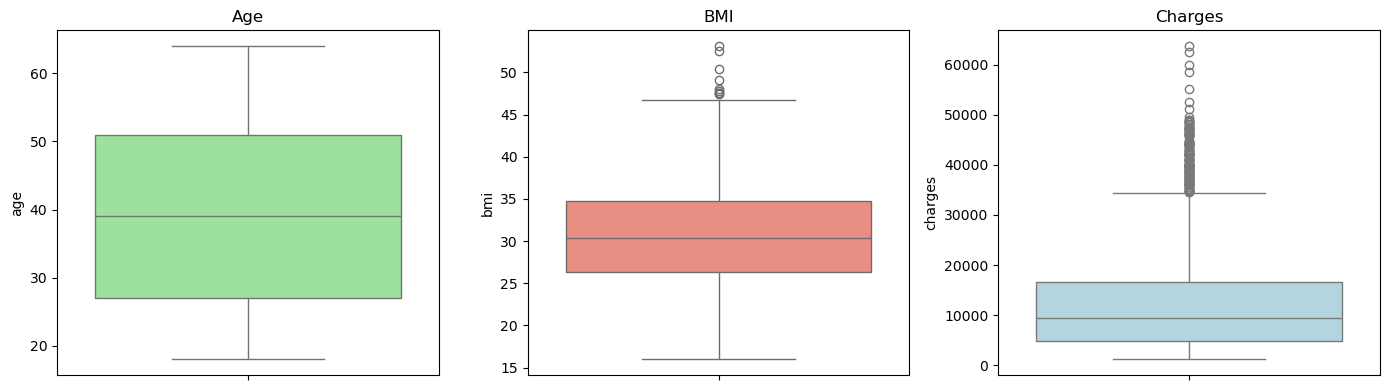

In [22]:
# Boxplots for age, bmi, and charges
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.boxplot(y=data['age'], color='lightgreen')
plt.title('Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['bmi'], color='salmon')
plt.title('BMI')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['charges'], color='lightblue')
plt.title('Charges')

plt.tight_layout()
plt.show()

### Categorical Features Count

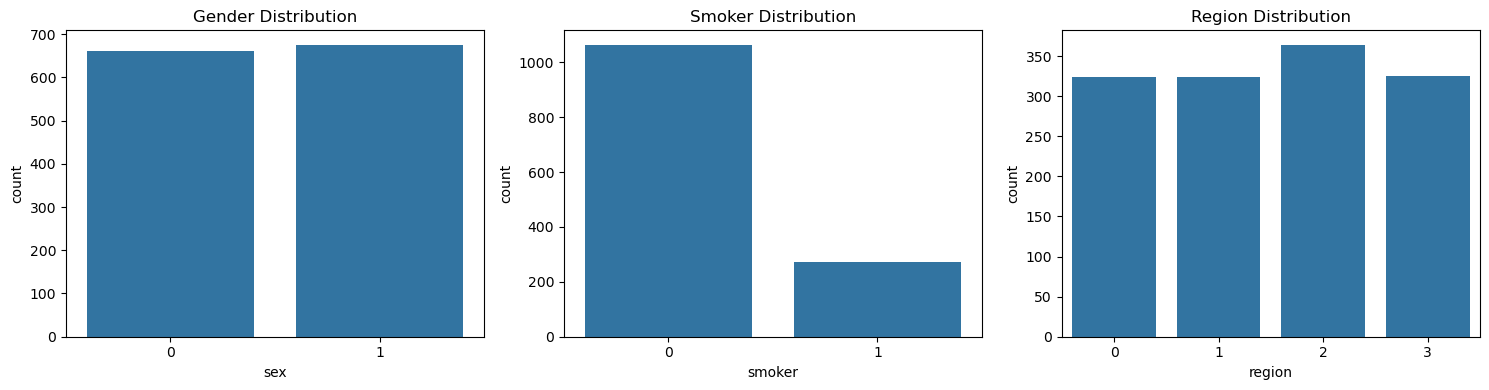

In [23]:
# Count plots
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(x='sex', data=data)
plt.title('Gender Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=data)
plt.title('Smoker Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='region', data=data)
plt.title('Region Distribution')

plt.tight_layout()
plt.show()

### Correlation Heatmap

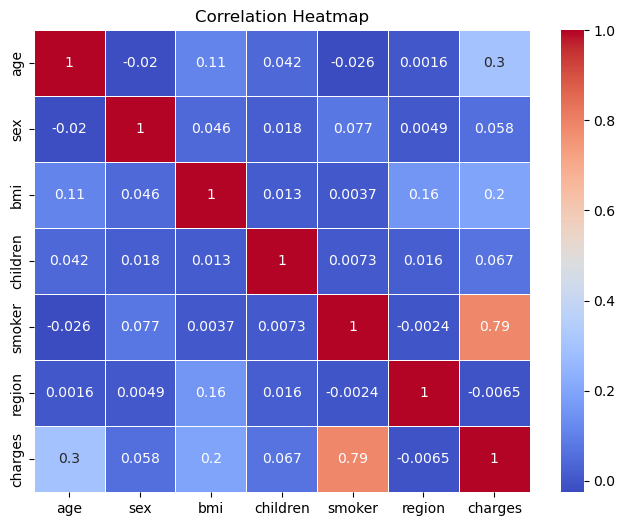

In [24]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Charges vs Key Features (Smoker, BMI, Age)

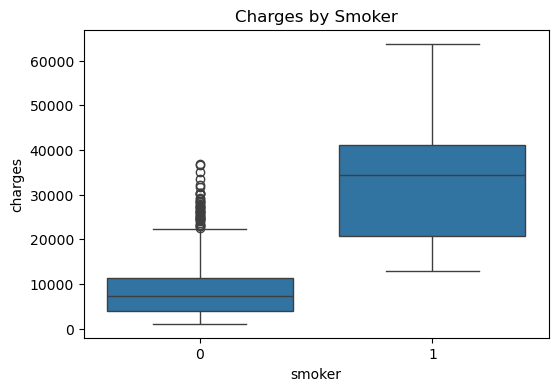

In [25]:
# Charges by smoker
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoker')
plt.show()

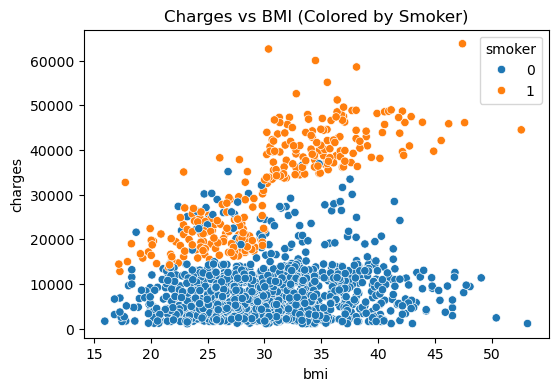

In [26]:
# Charges vs BMI
plt.figure(figsize=(6, 4))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)
plt.title('Charges vs BMI (Colored by Smoker)')
plt.show()

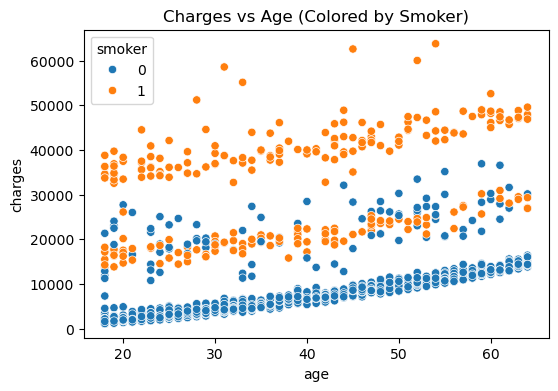

In [27]:
# Charges vs Age
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='charges', hue='smoker', data=data)
plt.title('Charges vs Age (Colored by Smoker)')
plt.show()

### Charges by Number of Children

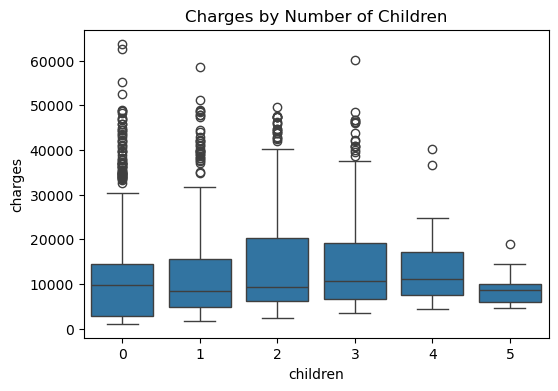

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='children', y='charges', data=data)
plt.title('Charges by Number of Children')
plt.show()

### Average Charges by Region

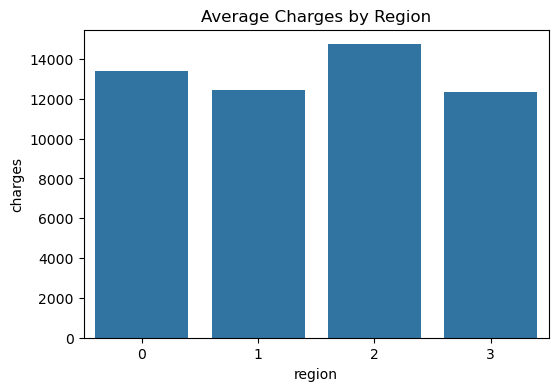

In [29]:
plt.figure(figsize=(6, 4))
sns.barplot(x='region', y='charges', data=data, estimator=np.mean, ci=None)
plt.title('Average Charges by Region')
plt.show()

### BMI Categories vs Charges

In [30]:
# Categorize BMI
data['bmi_category'] = pd.cut(data['bmi'],
                            bins=[0, 18.5, 24.9, 29.9, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

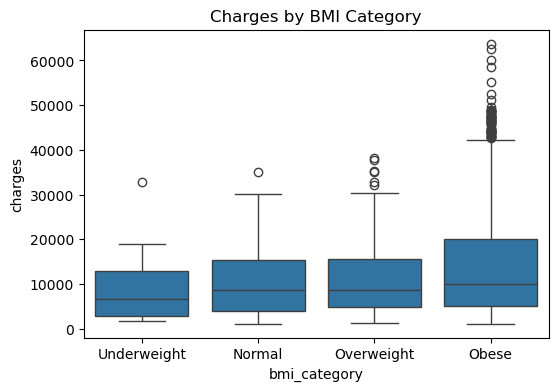

In [31]:
# Boxplot of charges by BMI category
plt.figure(figsize=(6, 4))
sns.boxplot(x='bmi_category', y='charges', data=data)
plt.title('Charges by BMI Category')
plt.show()

### Combined Effect of Smoker and BMI on Charges

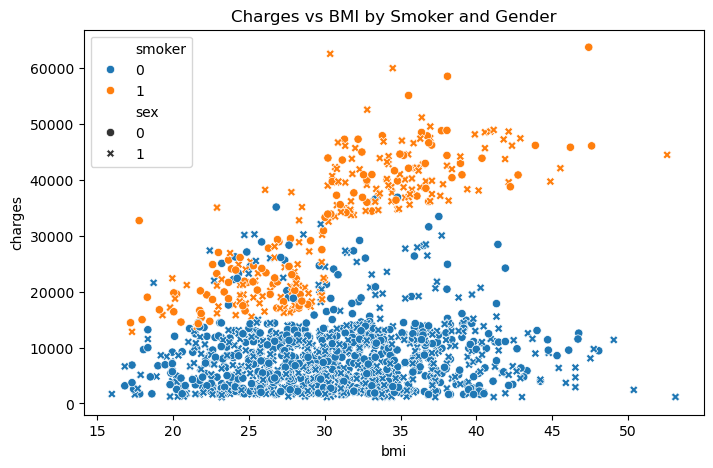

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker', style='sex')
plt.title('Charges vs BMI by Smoker and Gender')
plt.show()

### Charges by Age and Smoker (Regression Line)

<Figure size 700x500 with 0 Axes>

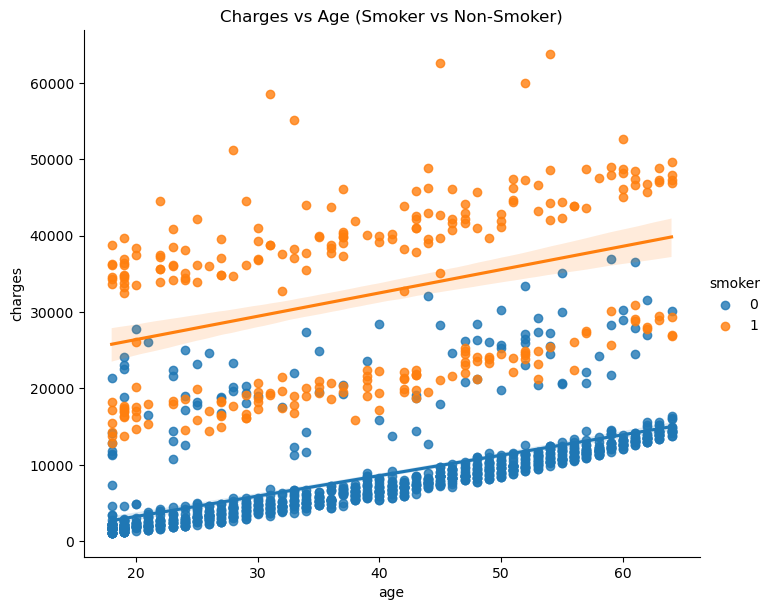

In [33]:
plt.figure(figsize=(7, 5))
sns.lmplot(x='age', y='charges', hue='smoker', data=data, height=6, aspect=1.2)
plt.title('Charges vs Age (Smoker vs Non-Smoker)')
plt.show()

### Charges Distribution by Gender

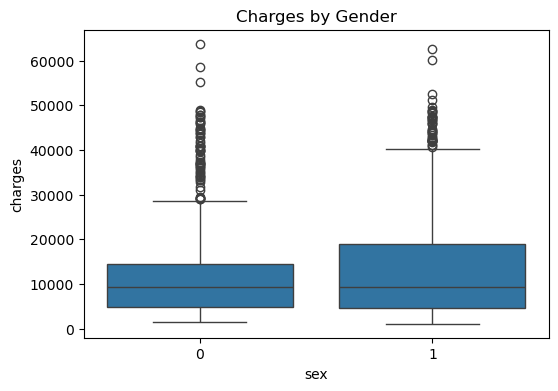

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Charges by Gender')
plt.show()

### Average Charges by Smoker and Gender

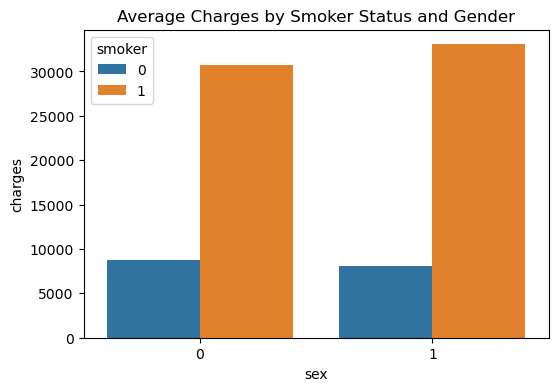

In [35]:
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='charges', hue='smoker', data=data, estimator=np.mean, ci=None)
plt.title('Average Charges by Smoker Status and Gender')
plt.show()

###  Heatmap of Categorical Interactions

In [36]:
# Pivot table for mean charges
pivot_table = data.pivot_table(values='charges', index='sex', columns='smoker', aggfunc='mean')

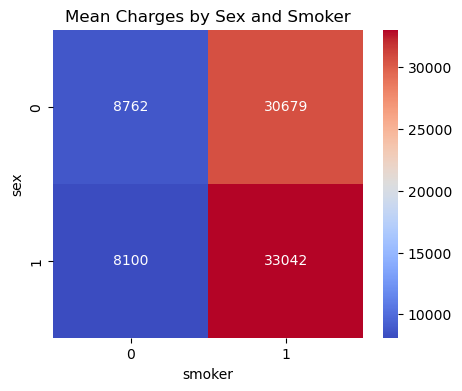

In [37]:
# Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Mean Charges by Sex and Smoker")
plt.show()

### Violin Plot of Charges by Region and Smoking

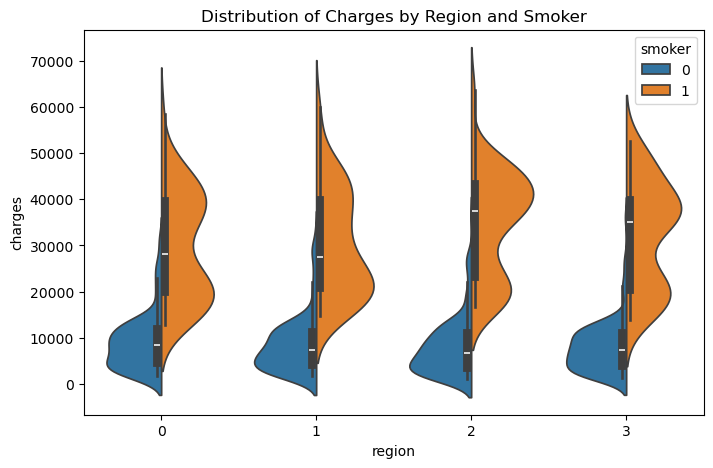

In [38]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='region', y='charges', hue='smoker', data=data, split=True)
plt.title('Distribution of Charges by Region and Smoker')
plt.show()

### Children vs Charges Scatter Plot

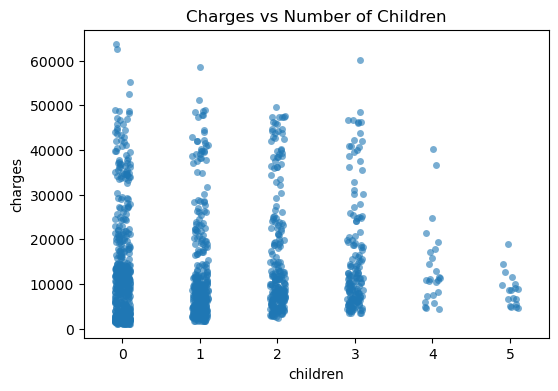

In [39]:
plt.figure(figsize=(6, 4))
sns.stripplot(x='children', y='charges', data=data, jitter=True, alpha=0.6)
plt.title('Charges vs Number of Children')
plt.show()

### Charges Distribution – Log Scale

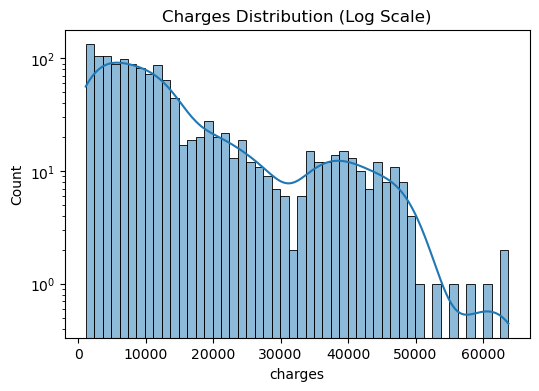

In [40]:
# Histogram with log scale
plt.figure(figsize=(6, 4))
sns.histplot(data['charges'], bins=50, kde=True)
plt.yscale('log')
plt.title('Charges Distribution (Log Scale)')
plt.show()

### Smoking Effect Across Age Groups

In [41]:
# Age Binning
data['age_group'] = pd.cut(data['age'], bins=[17, 30, 45, 60, 65], labels=['18-30', '31-45', '46-60', '61-65'])

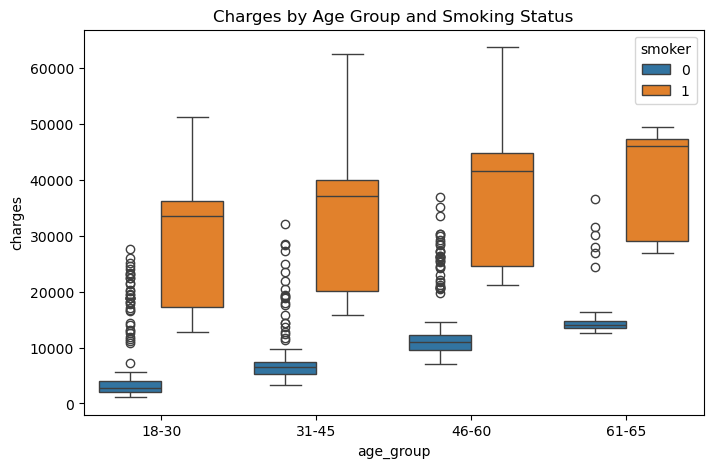

In [42]:
# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='age_group', y='charges', hue='smoker', data=data)
plt.title('Charges by Age Group and Smoking Status')
plt.show()

### Charges vs BMI with Regression Line

<Figure size 800x500 with 0 Axes>

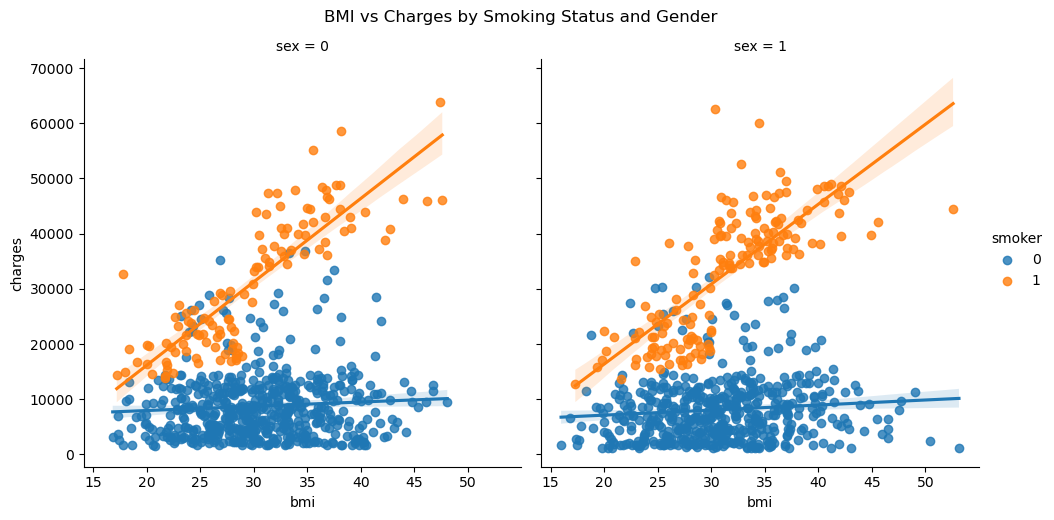

In [43]:
plt.figure(figsize=(8, 5))
sns.lmplot(data=data, x='bmi', y='charges', hue='smoker', col='sex', height=5)
plt.suptitle('BMI vs Charges by Smoking Status and Gender', y=1.03)
plt.show()

### Count of Smokers by Region

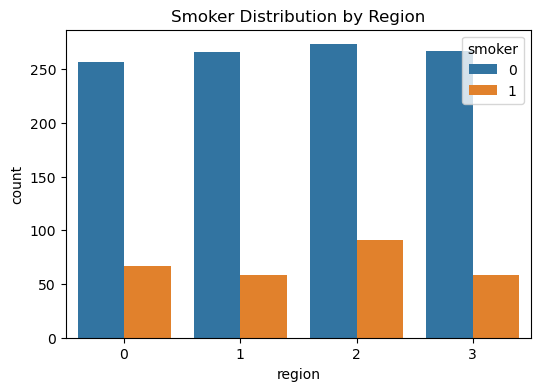

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x='region', hue='smoker', data=data)
plt.title('Smoker Distribution by Region')
plt.show()

### Statistical Summary by Smoker Status

In [45]:
data.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
0,1063.0,8440.660307,5992.973800,1121.8739,3988.883500,7345.72660,11363.019100,36910.60803
1,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


### Heatmap of All Pairwise Categorical Combinations

In [46]:
# Crosstab example: smoker vs children
pd.crosstab(data['children'], data['smoker'])

smoker,0,1
children,,
0,458,115
1,263,61
2,185,55
3,118,39
4,22,3
5,17,1


### Pairplot of Key Features

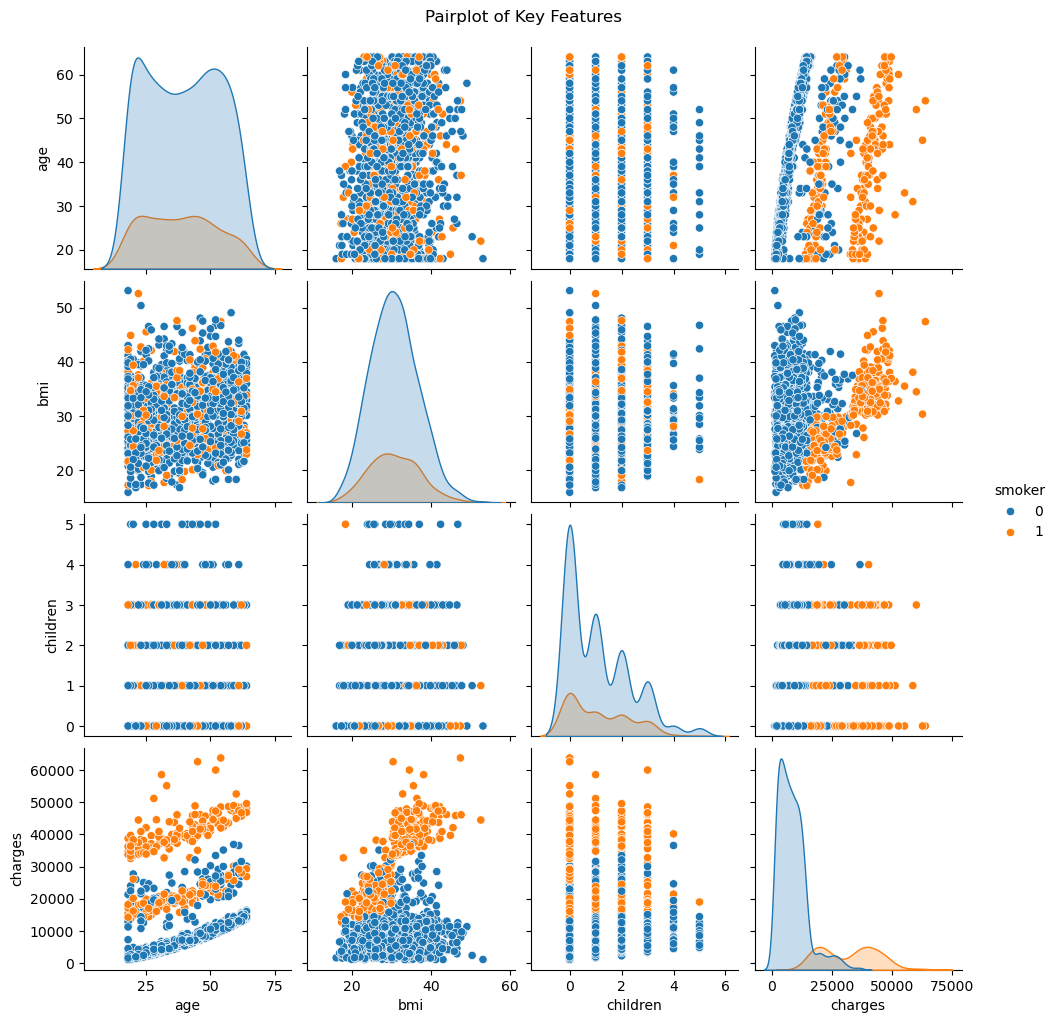

In [47]:
sns.pairplot(data[['age', 'bmi', 'children', 'charges', 'smoker']], hue='smoker')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

## Model Building & Evaluation

### Prepare the Data

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature-target split
X = data.drop(['charges'], axis=1)
y = data['charges']

In [49]:
# Drop target and any non-modeling/EDA columns
X = data.drop(columns=['charges', 'bmi_category', 'age_group', 'log_charges'], errors='ignore')

In [50]:
# Check again for non-numeric columns
print(X.dtypes)

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
dtype: object


In [51]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression 

In [53]:
# Import & Train
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [54]:
# Predict
lr_pred = lr.predict(X_test_scaled)

In [55]:
# Evaluate
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

In [56]:
print("Linear Regression Performance:")
print(f"MAE  : {lr_mae:.2f}")
print(f"RMSE : {lr_rmse:.2f}")
print(f"R²   : {lr_r2:.4f}")

Linear Regression Performance:
MAE  : 4182.35
RMSE : 5957.61
R²   : 0.8068


### Decision Tree Regressor

In [57]:
# Import & Train
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)  # No scaling needed for tree-based models

DecisionTreeRegressor(random_state=42)

In [58]:
# Predict
dt_pred = dt.predict(X_test)

In [59]:
# Evaluate
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

In [60]:
print("Decision Tree Performance:")
print(f"MAE  : {dt_mae:.2f}")
print(f"RMSE : {dt_rmse:.2f}")
print(f"R²   : {dt_r2:.4f}")

Decision Tree Performance:
MAE  : 2948.18
RMSE : 6339.11
R²   : 0.7813


### Random Forest Regressor

In [61]:
# Import & Train
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
# Predict
rf_pred = rf.predict(X_test)

In [63]:
# Evaluate
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

In [64]:
print("Random Forest Performance:")
print(f"MAE  : {rf_mae:.2f}")
print(f"RMSE : {rf_rmse:.2f}")
print(f"R²   : {rf_r2:.4f}")

Random Forest Performance:
MAE  : 2555.93
RMSE : 4628.27
R²   : 0.8834


### Gradient Boosting Regressor

In [65]:
# Import & Train
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [66]:
# Predict
gb_pred = gb.predict(X_test)

In [67]:
# Evaluate
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

In [68]:
print("Gradient Boosting Performance:")
print(f"MAE  : {gb_mae:.2f}")
print(f"RMSE : {gb_rmse:.2f}")
print(f"R²   : {gb_r2:.4f}")

Gradient Boosting Performance:
MAE  : 2508.42
RMSE : 4262.66
R²   : 0.9011


### Support Vector Regressor (SVR)

In [69]:
# Import & Train
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled, y_train)

SVR()

In [70]:
# Predict
svr_pred = svr.predict(X_test_scaled)

In [71]:
# Evaluate
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_r2 = r2_score(y_test, svr_pred)

In [72]:
print("Support Vector Regressor Performance:")
print(f"MAE  : {svr_mae:.2f}")
print(f"RMSE : {svr_rmse:.2f}")
print(f"R²   : {svr_r2:.4f}")

Support Vector Regressor Performance:
MAE  : 9252.80
RMSE : 14409.13
R²   : -0.1299


## Model Comparison

In [73]:
# Store all results in a list of dictionaries
model_results = [
    {'Model': 'Linear Regression', 'MAE': lr_mae, 'RMSE': lr_rmse, 'R²': lr_r2},
    {'Model': 'Decision Tree', 'MAE': dt_mae, 'RMSE': dt_rmse, 'R²': dt_r2},
    {'Model': 'Random Forest', 'MAE': rf_mae, 'RMSE': rf_rmse, 'R²': rf_r2},
    {'Model': 'Gradient Boosting', 'MAE': gb_mae, 'RMSE': gb_rmse, 'R²': gb_r2},
    {'Model': 'SVR', 'MAE': svr_mae, 'RMSE': svr_rmse, 'R²': svr_r2}
]

In [74]:
# Create DataFrame
comparison_data = pd.DataFrame(model_results)

In [75]:
# Sort by RMSE
comparison_data = comparison_data.sort_values(by='RMSE').reset_index(drop=True)
comparison_data

,Model,MAE,RMSE,R²
0,Gradient Boosting,2508.418118,4262.658690,0.901117
1,Random Forest,2555.929427,4628.266032,0.883428
2,Linear Regression,4182.353155,5957.608800,0.806847
3,Decision Tree,2948.178904,6339.107593,0.781317
4,SVR,9252.803703,14409.131813,-0.129884


## Hyperparameter Tuning

### Grid Search

In [76]:
from sklearn.model_selection import GridSearchCV

# Example: Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [77]:
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [78]:
# Best model and parameters
print("Best Parameters:", grid.best_params_)
best_rf = grid.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


### Random Search

In [79]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [80]:
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [81]:
print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': None}


### Evaluate Tuned Model

In [82]:
y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Tuned Random Forest RMSE:", rmse)

Tuned Random Forest RMSE: 4461.244529994504


## Feature Importance

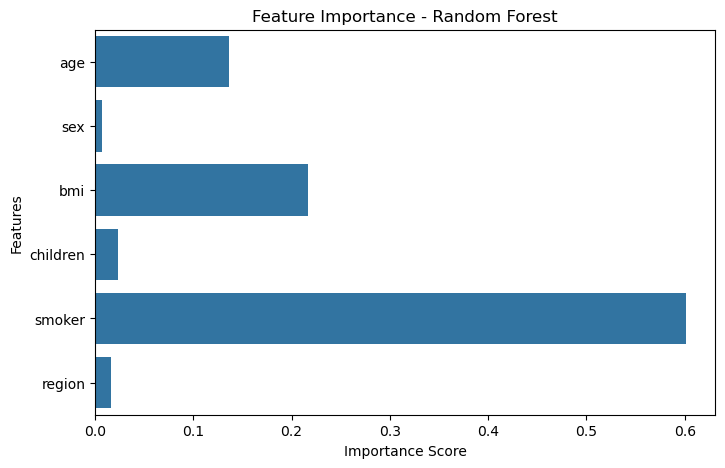

In [83]:
# Example for Random Forest
feature_importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Conclusion

In this project, we analyzed a health insurance dataset to build a machine learning model that predicts individual medical charges based on demographic and lifestyle attributes.

**Key Highlights:**
- Performed **extensive EDA** to uncover patterns and relationships (e.g., smokers pay significantly more).

- Applied **label encoding and feature scaling** for model readiness.

- Trained and evaluated five regression models:

  - **Linear Regression**

  - **Decision Tree Regressor**

  - **Random Forest Regressor**

  - **Gradient Boosting Regressor**

  - **Support Vector Regressor (SVR)**

- **Random Forest Regressor** or **Gradient Boosting** emerged as the best models based on RMSE and R².

- Feature importance analysis revealed:

  - **Smoking**, **age**, and **BMI** are the most significant factors influencing medical costs.